<a href="https://colab.research.google.com/github/Thiago-NovaesB/MestradoPuc.jl/blob/main/Computa%C3%A7%C3%A3oEvolucionaria/Exerc%C3%ADcio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lista 4

In [11]:
# https://deap.readthedocs.io/en/master/
# instalar pacote deap
!pip install deap
import numpy as np
import random
import matplotlib.pyplot as plt
from deap import creator, tools, base, algorithms

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Questão 1

In [36]:
# dados de entrada
x = np.array([-1.0, -0.7, -0.4, -0.1, 0.2, 0.5, 0.8, 1.0])
y = np.array([36.547, 17.264, 8.155, 3.852, 1.820, 0.860, 0.406, 0.246])

In [37]:
# função objetivo
def objective_function(individual):
  a = individual[0]
  b = individual[1]
  z = a*np.e**(b*x)
  return np.linalg.norm(z-y),

In [38]:
# Tipos da fitness e indivíduos
creator.create('FitnessMin', base.Fitness, weights=(-1.0,))
creator.create('Individual', list, fitness=creator.FitnessMin)

/usr/local/lib/python3.9/dist-packages/deap/creator.py:138: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.9/dist-packages/deap/creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [39]:
toolbox = base.Toolbox()

# gerador da variável de decisão
toolbox.register('attr_real', random.gauss, 0, 10)

# Inicializar individuo e população
# initRepeat(container, func, n)
toolbox.register('individual', tools.initRepeat, creator.Individual, toolbox.attr_real, 2)  

# População
toolbox.register('population', tools.initRepeat, list, toolbox.individual)

In [40]:
# Operadores
toolbox.register('evaluate', objective_function)
toolbox.register('mate', tools.cxSimulatedBinaryBounded, eta=0, low=-10, up=10)  # eta, low, up
toolbox.register('mutate', tools.mutGaussian, mu=0, sigma=1, indpb=0.05)
toolbox.register('select', tools.selTournament, tournsize=3)

In [43]:
pop = toolbox.population(n=100)
hof = tools.HallOfFame(1)  # melhor de todo o processo
stats = tools.Statistics(lambda ind:ind.fitness.values)
stats.register('avg', np.mean)
stats.register('std', np.std)
stats.register('min', np.min)
stats.register('max', np.max)

In [44]:
pop, log = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.1, ngen=50, 
                                stats=stats, halloffame=hof, verbose=True)

gen	nevals	avg        	std        	min    	max        
0  	100   	5.98601e+11	5.84077e+12	5.53379	5.87077e+13
1  	52    	258676     	2.48917e+06	7.20849	2.50224e+07
2  	53    	322.327    	1787.28    	6.6244 	15013.8    
3  	62    	45.4996    	60.4307    	11.6857	603.061    
4  	57    	42.7041    	88.2603    	4.37951	724.693    
5  	51    	20.0707    	11.5912    	2.03496	101.623    
6  	39    	15.8101    	10.3806    	2.03496	64.887     
7  	53    	15.3606    	34.0062    	2.03496	347.56     
8  	62    	12.028     	16.307     	2.03496	155.335    
9  	52    	32.6507    	245.271    	1.8233 	2470.43    
10 	59    	8.17704    	22.3971    	1.8233 	196.94     
11 	52    	2.73446    	2.79208    	0.626551	18.8       
12 	57    	2.51511    	4.18611    	0.626551	43.1367    
13 	54    	3.03588    	6.4821     	0.376813	50.9339    
14 	56    	1.80984    	0.519592   	0.376813	2.36967    
15 	56    	1.63576    	0.926848   	0.326278	8.22314    
16 	58    	1.00459    	0.656044   	0.307293	2.28351    
17 	

In [9]:
# Melhor solução
print('Melhor indivíduo:', hof[0])

Melhor indivíduo: [3.0088853563593303, -2.4967553494691472]


In [10]:
# Resultado da fo do mlehor indivíduo:
print('Melhor F.O.:', objective_function(hof[0]))

Melhor F.O.: (0.024052028159822197,)


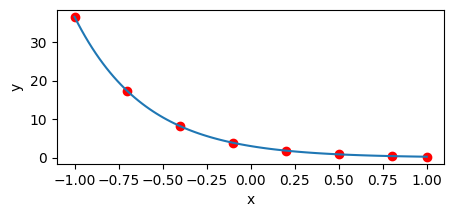

In [13]:
X = np.linspace(-1,1,100)
plt.figure(figsize=(5,2))
plt.plot(X, hof[0][0]*np.e**(hof[0][1]*X))
plt.scatter(x, y, color='red')  # melhor
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Questão 2

In [18]:
# função objetivo
def objective_function(individual):
  return 3*individual[0]+5*individual[1],

def feasible(individual):
  if (individual[0]+5)**2 + (individual[1]+5)**2 >= 25:
    return False
  if individual[0] > 4:
    return False
  if individual[1] > 6:
    return False
  if individual[0] < 0:
    return False
  if individual[1] < 0:
    return False
  if 3*individual[0] + 2*individual[1] > 18:
    return False
  return True

In [19]:
# Tipos da fitness e indivíduos
creator.create('FitnessMax', base.Fitness, weights=(1.0,))
creator.create('Individual', list, fitness=creator.FitnessMax)

/usr/local/lib/python3.9/dist-packages/deap/creator.py:138: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.9/dist-packages/deap/creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [21]:
toolbox = base.Toolbox()

# gerador da variável de decisão
toolbox.register('attr_real1', random.uniform, 0, 4)
toolbox.register('attr_real2', random.uniform, 0, 6)

# Inicializar individuo e população
toolbox.register('individual', tools.initCycle, creator.Individual, (toolbox.attr_real1, toolbox.attr_real2), 1)  

# População
toolbox.register('population', tools.initRepeat, list, toolbox.individual)

In [31]:
# Operadores
toolbox.register('evaluate', objective_function)
toolbox.register('mate', tools.cxSimulatedBinaryBounded, eta=0, low=0, up=6)  # eta, low, up
toolbox.register('mutate', tools.mutGaussian, mu=0, sigma=1, indpb=0.05)
toolbox.register('select', tools.selTournament, tournsize=3)

In [32]:
pop = toolbox.population(n=100)
hof = tools.HallOfFame(1)  # melhor de todo o processo
stats = tools.Statistics(lambda ind:ind.fitness.values)
stats.register('avg', np.mean)
stats.register('std', np.std)
stats.register('min', np.min)
stats.register('max', np.max)

In [33]:
pop, log = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.1, ngen=50, 
                                stats=stats, halloffame=hof, verbose=True)

gen	nevals	avg    	std    	min     	max    
0  	100   	20.0612	10.0785	0.593964	41.4878
1  	41    	28.5126	7.58421	9.40538 	41.4878
2  	49    	34.2156	4.55249	23.8164 	47.3703
3  	53    	37.8853	3.12091	26.9178 	43.5577
4  	51    	40.8059	1.75419	35.3834 	43.6181
5  	58    	41.8417	2.46002	23.193  	46.8049
6  	61    	43.234 	1.5928 	37.9824 	50.6083
7  	47    	44.1343	1.96154	32.3037 	50.6083
8  	52    	45.336 	1.61858	40.0542 	50.6083
9  	53    	46.2262	1.71316	38.6024 	53.0472
10 	60    	47.2438	1.40662	42.731  	53.0472
11 	41    	47.7108	2.87934	27.7199 	53.0472
12 	52    	48.476 	3.03401	37.6189 	54.266 
13 	61    	49.9077	3.01676	37.9539 	54.266 
14 	57    	51.5923	4.09522	15.9627 	54.266 
15 	56    	52.8377	1.34818	44.1956 	54.3846
16 	57    	53.524 	0.551452	52.0198 	54.3846
17 	45    	53.9433	0.585221	49.6806 	54.3846
18 	44    	54.2769	0.301267	53.6189 	56.9961
19 	63    	54.3572	0.686248	51.7589 	59.8985
20 	52    	54.3705	1.1638  	47.8646 	59.8985
21 	46    	54.3773	1.95146 

In [34]:
# Melhor solução
print('Melhor indivíduo:', hof[0])

Melhor indivíduo: [6.55153086897465, 10.908470547233053]


In [35]:
# Resultado da fo do mlehor indivíduo:
print('Melhor F.O.:', objective_function(hof[0]))

Melhor F.O.: (74.19694534308921,)


## Questão 3

In [45]:
# dados de entrada
x = np.array([-5.0, 2, 10])
y = np.array([10, 1, 5])

In [46]:
# função objetivo
def objective_function(individual):
  obj = 0
  for i in range(len(x)):
    obj += np.sqrt((x[i]-individual[0])**2 + (y[i]-individual[1])**2)
  return obj,

def feasible(individual):
  for i in range(len(x)):
    if np.sqrt((x[i]-individual[0])**2 + (y[i]-individual[1])**2) > 10:
      return False
  return True

In [47]:
# Tipos da fitness e indivíduos
creator.create('FitnessMin', base.Fitness, weights=(-1.0,))
creator.create('Individual', list, fitness=creator.FitnessMin)

/usr/local/lib/python3.9/dist-packages/deap/creator.py:138: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.9/dist-packages/deap/creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [48]:
toolbox = base.Toolbox()

# gerador da variável de decisão
toolbox.register('attr_real1', random.uniform, -5, 10)
toolbox.register('attr_real2', random.uniform, 1, 10)

# Inicializar individuo e população
toolbox.register('individual', tools.initCycle, creator.Individual, (toolbox.attr_real1, toolbox.attr_real2), 1)  

# População
toolbox.register('population', tools.initRepeat, list, toolbox.individual)

In [68]:
# Operadores
toolbox.register('evaluate', objective_function)
toolbox.register('mate', tools.cxSimulatedBinaryBounded, eta=0.1, low=-5, up=10)  # eta, low, up
toolbox.register('mutate', tools.mutGaussian, mu=0, sigma=1, indpb=0.05)
toolbox.register('select', tools.selTournament, tournsize=3)

In [69]:
pop = toolbox.population(n=100)
hof = tools.HallOfFame(1)  # melhor de todo o processo
stats = tools.Statistics(lambda ind:ind.fitness.values)
stats.register('avg', np.mean)
stats.register('std', np.std)
stats.register('min', np.min)
stats.register('max', np.max)

In [70]:
pop, log = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.1, ngen=50, 
                                stats=stats, halloffame=hof, verbose=True)

gen	nevals	avg    	std   	min    	max    
0  	100   	23.6764	2.2808	20.0986	29.3419
1  	60    	21.7901	1.50132	20.0986	26.4315
2  	62    	20.6587	0.723528	20.094 	23.7185
3  	52    	20.2582	0.250805	20.0804	21.3531
4  	62    	20.1159	0.0529128	20.08  	20.4004
5  	65    	20.1217	0.199496 	20.08  	21.9583
6  	49    	20.0924	0.0130776	20.08  	20.1911
7  	59    	20.0878	0.0227984	20.08  	20.2981
8  	66    	20.0812	0.00215732	20.08  	20.0918
9  	69    	20.0811	0.0069723 	20.08  	20.147 
10 	56    	20.0802	0.000818101	20.08  	20.0861
11 	67    	20.08  	8.18101e-05	20.08  	20.0805
12 	48    	20.0828	0.0225427  	20.08  	20.2995
13 	46    	20.08  	9.23962e-06	20.08  	20.08  
14 	57    	20.08  	1.45095e-05	20.08  	20.0801
15 	49    	20.0801	0.00166213 	20.08  	20.0967
16 	56    	20.0816	0.0161694  	20.08  	20.2425
17 	64    	20.0838	0.0375706  	20.08  	20.4576
18 	50    	20.0862	0.0465604  	20.08  	20.5253
19 	53    	20.0801	0.000959136	20.08  	20.0896
20 	62    	20.08  	1.97349e-08	20.08  	20.0

In [71]:
# Melhor solução
print('Melhor indivíduo:', hof[0])

Melhor indivíduo: [2.4520404237353954, 2.824059558322993]


In [72]:
# Resultado da fo do mlehor indivíduo:
print('Melhor F.O.:', objective_function(hof[0]))

Melhor F.O.: (20.07996715029404,)


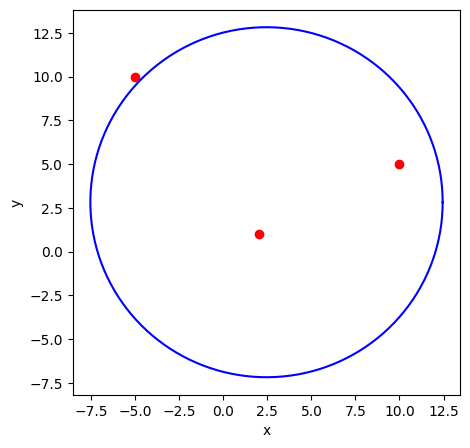

In [73]:
theta = np.linspace( 0 , 2 * np.pi , 150 )
 
radius = 10
 
a = radius * np.cos( theta ) + hof[0][0]
b = radius * np.sin( theta ) + hof[0][1]

plt.figure(figsize=(5,5))
plt.plot(a, b, color='blue')
plt.scatter(x, y, color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.show()